#FINAL PROJECT MODEL STOKASTIK 2

Kelompok 2

1.   Aisyah Gefira 2006572945
2.   Getrisia Gunawan 2006571482
3.   Joesoef Septadi Wijaya 2006473062
4.   Valery Ongso Putri 2006570965

###Import Package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import seaborn as sns

## **Simulating stock price dynamics using a geometric Brownian motion**

In [ ]:
#Input data
df = yf.download('BBCA.JK',
        start = '2020-01-01',
        end = '2023-11-08')

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6168.911133,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6270.343750,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6210.405762,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6215.016602,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6159.689941,53692500


###Daily Return Saham

In [ ]:
returns = df['Adj Close'].pct_change().dropna()
print(returns)

Date
2020-01-03    0.016443
2020-01-06   -0.009559
2020-01-07    0.000742
2020-01-08   -0.008902
2020-01-09    0.008982
                ...   
2023-11-01   -0.017143
2023-11-02    0.029070
2023-11-03    0.005650
2023-11-06    0.016854
2023-11-07   -0.008287
Name: Adj Close, Length: 937, dtype: float64


<Axes: title={'center': "BBCA's returns"}, xlabel='Date'>

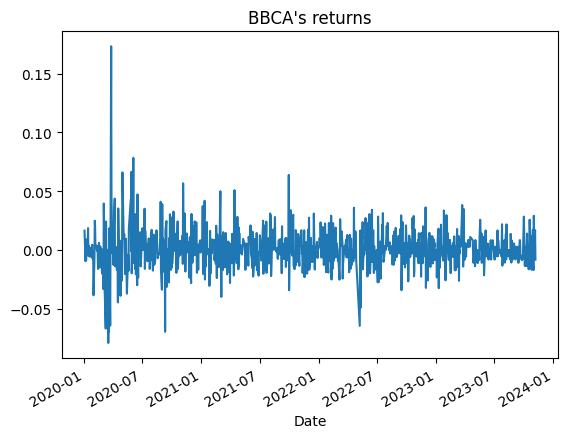

In [ ]:
returns.plot(title = "BBCA's returns")

Date
2020-01-06   -0.009559
2020-01-08   -0.008902
2020-01-10   -0.002226
2020-01-15   -0.005094
2020-01-20   -0.005818
                ...   
2023-10-26   -0.016901
2023-10-27   -0.002865
2023-10-31   -0.011299
2023-11-01   -0.017143
2023-11-07   -0.008287
Name: Adj Close, Length: 437, dtype: float64
Date
2020-01-03    0.016443
2020-01-07    0.000742
2020-01-09    0.008982
2020-01-13    0.002974
2020-01-14    0.018532
                ...   
2023-10-25    0.011396
2023-10-30    0.017241
2023-11-02    0.029070
2023-11-03    0.005650
2023-11-06    0.016854
Name: Adj Close, Length: 419, dtype: float64


<Axes: title={'center': 'Kenaikan Harga Saham Bank BCA'}, xlabel='Date'>

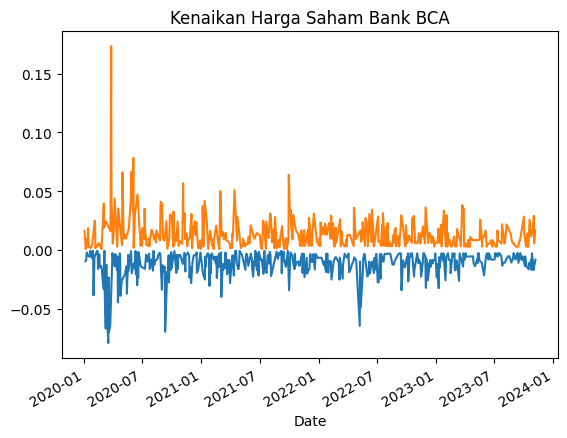

In [ ]:
#Mencari nilai return negatif
negatif = returns[returns < 0]
print(negatif)

negatif.plot(title = "Penurunan Harga Saham Bank BCA")

#Mencari nilai return positif
positif = returns[returns > 0]
print(positif)

positif.plot(title = "Kenaikan Harga Saham Bank BCA")

In [ ]:
#Mendapatkan nilai terendah
terendah = returns.idxmin()
baris_terendah = returns.loc[[terendah]]

# Mendapatkan nilai tertinggi
tertinggi = returns.idxmax()
baris_tertinggi = returns.loc[[tertinggi]]

print("Baris dengan nilai terendah:")
print(baris_terendah)

print("\nBaris dengan nilai tertinggi:")
print(baris_tertinggi)

Baris dengan nilai terendah:
Date
2020-03-17   -0.079137
Name: Adj Close, dtype: float64

Baris dengan nilai tertinggi:
Date
2020-03-26    0.173333
Name: Adj Close, dtype: float64


Baris dengan nilai terendah:
Date
2021-03-04   -0.04
Name: Adj Close, dtype: float64

Baris dengan nilai tertinggi:
Date
2021-09-30    0.06383
Name: Adj Close, dtype: float64


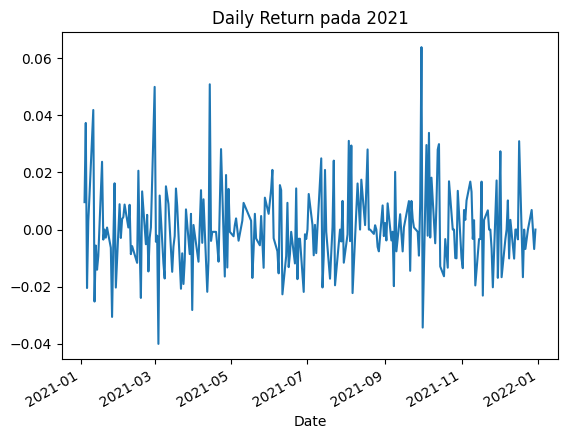

In [ ]:
#Melihat daily return pada 2021
return2021 = returns[returns.index.year == 2021]
return2021.plot(title = "Daily Return pada 2021")

# Mendapatkan nilai terendah dari kolom Adj Close yang merupakan indeks dari baris terendah
terendah = return2021.idxmin()
baris_terendah = return2021.loc[[terendah]]

# Mendapatkan nilai tertinggi dari kolom Adj Close yang merupakan indeks dari baris tertinggi
tertinggi = return2021.idxmax()
baris_tertinggi = return2021.loc[[tertinggi]]

print("Baris dengan nilai terendah:")
print(baris_terendah)

print("\nBaris dengan nilai tertinggi:")
print(baris_tertinggi)

Baris dengan nilai terendah:
Date
2022-05-09   -0.064615
Name: Adj Close, dtype: float64

Baris dengan nilai tertinggi:
Date
2022-11-30    0.036212
Name: Adj Close, dtype: float64


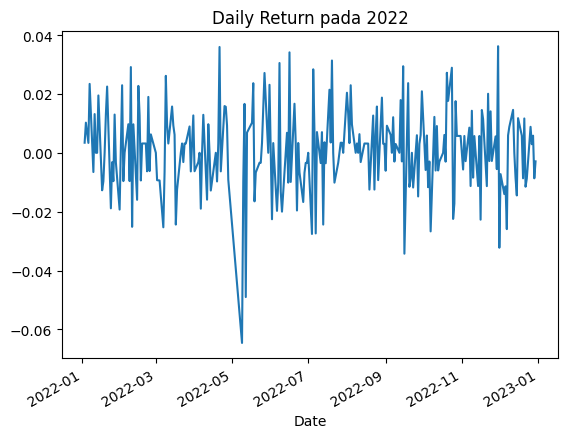

In [ ]:
#Melihat daily return 2022
return2022 = returns[returns.index.year == 2022]
return2022.plot(title = "Daily Return pada 2022")

# Mendapatkan nilai terendah dari kolom Adj Close yang merupakan indeks dari baris terendah
terendah = return2022.idxmin()
baris_terendah = return2022.loc[[terendah]]

# Mendapatkan nilai tertinggi dari kolom Adj Close yang merupakan indeks dari baris tertinggi
tertinggi = return2022.idxmax()
baris_tertinggi = return2022.loc[[tertinggi]]

print("Baris dengan nilai terendah:")
print(baris_terendah)

print("\nBaris dengan nilai tertinggi:")
print(baris_tertinggi)

In [ ]:
#Melihat rata-rata daily return setiap tahunnya
rata_tahunan = df['Adj Close'].resample('Y').mean()

print(rata_tahunan)

Date
2020-12-31    5615.863366
2021-12-31    6399.176465
2022-12-31    7754.899067
2023-12-31    8809.514685
Freq: A-DEC, Name: Adj Close, dtype: float64


###Simulasi Monte Carlo menggunakan GBM

In [ ]:
#Splitting Data
test = returns[returns.index.year == 2023]
train = returns[returns.index.year < 2023]

In [ ]:
T = len(test)
N = len(test)
S_0 = df.loc[train.index[-1], "Adj Close"]
N_SIM = 10000
mu = train.mean()
sigma = train.std()
print(mu)

0.0005744911293894134


In [ ]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=42, antithetic_var=False):
    np.random.seed(random_seed)
    # time increment
    dt = T/N
    # Brownian
    if antithetic_var:
        dW_ant = np.random.normal(scale=np.sqrt(dt), size=(int(n_sims/2), N + 1))
        dW = np.concatenate((dW_ant, -dW_ant), axis=0)
    else:
        dW = np.random.normal(scale=np.sqrt(dt), size=(n_sims, N + 1))
    # simulate the evolution of the process
    S_t = s_0 * np.exp(np.cumsum((mu - 0.5*sigma**2)*dt + sigma*dW, axis=1))
    S_t[:, 0] = s_0
    return S_t


In [ ]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
sim_df = pd.DataFrame(np.transpose(gbm_simulations),
                      index=train.index[-1:].union(test.index))

In [ ]:
res_df = sim_df.mean(axis=1).to_frame()
res_df = res_df.join(df["Adj Close"])
res_df.columns = ["simulation_average", "adj_close_price"]

In [ ]:
res_df

,simulation_average,adj_close_price
Date,,
2022-12-30,8342.645508,8342.645508
2023-01-02,8351.619910,8342.645508
2023-01-03,8355.002074,8342.645508
2023-01-04,8360.997914,8147.495605
2023-01-05,8365.211211,8049.920410
...,...,...
2023-11-01,9324.828112,8559.162109
2023-11-02,9331.355568,8807.974609
2023-11-03,9334.607627,8857.737305


In [ ]:
res_df.to_excel('results.xlsx')

<Axes: title={'center': "Simulation's results"}, xlabel='Date'>

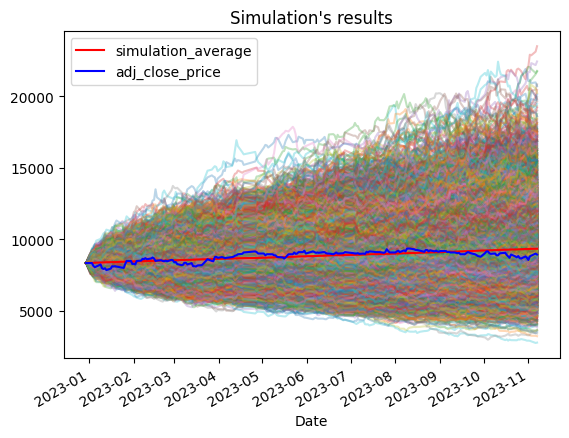

In [ ]:
ax = sim_df.plot(
    alpha=0.3, legend=False, title="Simulation's results"
)
res_df.plot(ax=ax, color = ["red", "blue"])

###Uji Hasil Prediksi

In [ ]:
 mean_absolute_percentage_error(res_df['adj_close_price'],res_df['simulation_average'])

0.02399650698186115

# **Estimating Value-at-Risk using Monte Carlo**

In [ ]:
RISKY_ASSETS = ['BBCA']
SHARES = 5
N_SIMS = 10**5
X = 1

N_SIMS = Jumlah Simulasi yang dilakukan
SHARES = Jumlah saham yang dimiliki

In [ ]:
returns2 = pd.DataFrame(returns)

In [ ]:
returns2 = returns2.rename(columns={'Adj Close': 'Returns'})

In [ ]:
cov_mat = returns2.cov()

In [ ]:
chol_mat = np.linalg.cholesky(cov_mat)

In [ ]:
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(
    np.matmul(chol_mat, np.transpose(rv))
)

rv = array NumPy 2D dengan dimensi (N_SIMS, len(RISKY_ASSET)), di mana setiap elemennya adalah nilai acak yang disampel dari distribusi normal.

In [ ]:
r = np.mean(returns2, axis=0).values
sigma = np.std(returns2, axis=0).values
S_0 = df["Adj Close"].values[-1]
P_0 = np.sum(SHARES * S_0)

S_0 = mewakili harga penutupan terakhir dari aset tersebut.
P_0 = jumlah total portofolio
sigma = deviasi standar pengembalian di sepanjang sumbu yang ditentukan.
r = rata-rata pengembalian

In [ ]:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * X +
                   sigma * np.sqrt(X) * correlated_rv)

In [ ]:
P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

In [ ]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)
for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: Rupiah {-y:.2f}')

1-day VaR with 99.99% confidence: Rupiah 31.14
1-day VaR with 99.9% confidence: Rupiah 22.49
1-day VaR with 99.0% confidence: Rupiah 12.03


<ipython-input-28-405f8e391421>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(P_diff, kde=False)


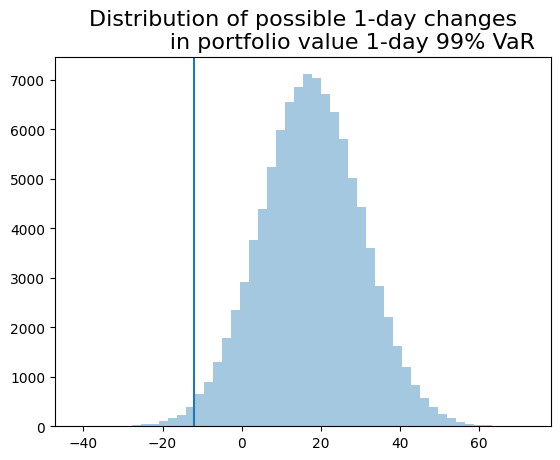

In [ ]:
ax = sns.distplot(P_diff, kde=False)
ax.set_title("""Distribution of possible 1-day changes
              in portfolio value 1-day 99% VaR""",
              fontsize=16)
ax.axvline(var[2], 0, 10000)